<a href="https://colab.research.google.com/github/batwhite/Tempreture-Prediction/blob/master/Aman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/batwhite/Tempreture-Prediction.git

Cloning into 'Tempreture-Prediction'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [64]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sklearn
from sklearn.model_selection import train_test_split

In [65]:

df = pd.read_csv("/content/Tempreture-Prediction/SmallOffice_Temperate_Results.csv")
print(df.head())
df.describe()




   WallU  RoofU  RoofAbp  ...  c1: Cooling  c2: Interior Lighting  c4: Fans
0    0.2    0.2      0.3  ...     35098.69               46648.05    704.31
1    0.2    0.2      0.3  ...     21936.68               46648.05    704.31
2    0.2    0.2      0.3  ...     15953.95               46648.05    704.31
3    0.2    0.2      0.3  ...     48064.44              108845.46    986.05
4    0.2    0.2      0.3  ...     30040.27              108845.46    986.05

[5 rows x 11 columns]


,WallU,RoofU,RoofAbp,WinU,WinSHGC,LPD,COP,c0: Heating,c1: Cooling,c2: Interior Lighting,c4: Fans
count,27000.000000,27000.000000,27000.000000,27000.00000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,1.800000,1.800000,0.500000,3.50000,0.425000,9.000000,4.000000,19.969122,79264.447551,139944.160000,2648.688249
std,1.131392,1.131392,0.163302,1.41424,0.256179,4.472219,1.224768,31.703344,36673.019831,69540.101712,821.294770
min,0.200000,0.200000,0.300000,1.50000,0.050000,3.000000,2.500000,0.000000,15655.430000,46648.050000,704.310000
25%,1.000000,1.000000,0.300000,2.50000,0.200000,6.000000,2.500000,2.510000,51818.365000,93296.107500,2012.897500
50%,1.800000,1.800000,0.500000,3.50000,0.425000,9.000000,4.000000,8.400000,71431.930000,139944.160000,2616.900000
75%,2.600000,2.600000,0.700000,4.50000,0.650000,12.000000,5.500000,23.530000,99485.402500,186592.212500,3274.577500
max,3.400000,3.400000,0.700000,5.50000,0.800000,15.000000,5.500000,409.810000,204846.540000,233240.270000,4804.160000


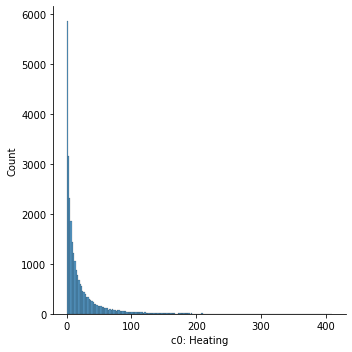

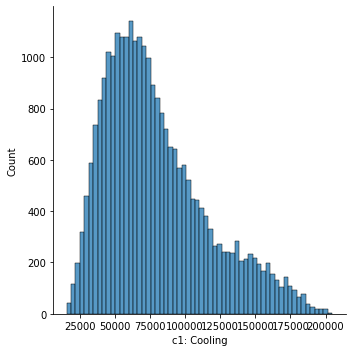

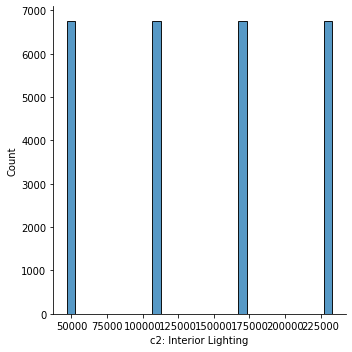

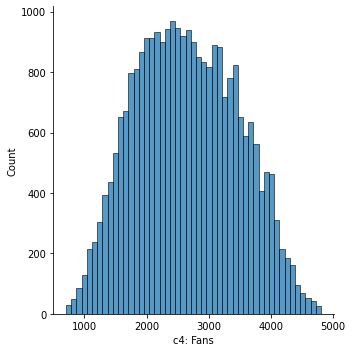

In [66]:
sns.displot(df['c0: Heating'],binwidth = 2)
sns.displot(df['c1: Cooling'])
sns.displot(df['c2: Interior Lighting'])
sns.displot(df['c4: Fans'])

In [91]:
normalized = (df.iloc[:,-4:] - np.mean(df.iloc[:,-4:]))/np.std(df.iloc[:,-4:])
normalized
std = np.std(df.iloc[:,-4:])
mean = np.mean(df.iloc[:,-4:])
normalized_df = pd.concat([df.iloc[:,:-4], normalized],axis = 1)

,c0: Heating,c1: Cooling,c2: Interior Lighting,c4: Fans
0,-0.164311,-1.204334,-1.341641,-2.367499
1,-0.339060,-1.563243,-1.341641,-2.367499
2,-0.418232,-1.726383,-1.341641,-2.367499
3,-0.398360,-0.850778,-0.447214,-2.024449
4,-0.485104,-1.342270,-0.447214,-2.024449
...,...,...,...,...
26995,-0.256417,1.033207,0.447214,2.230704
26996,-0.358301,0.161944,0.447214,2.230704
26997,-0.164942,3.263408,1.341641,2.554272
26998,-0.339375,1.229096,1.341641,2.554272


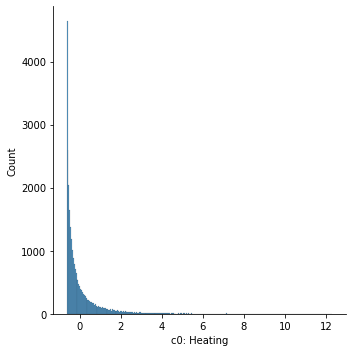

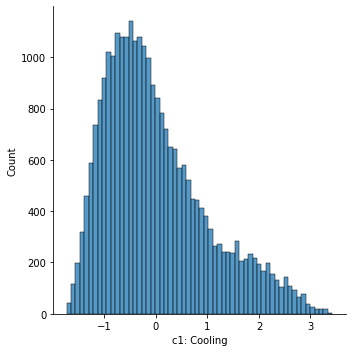

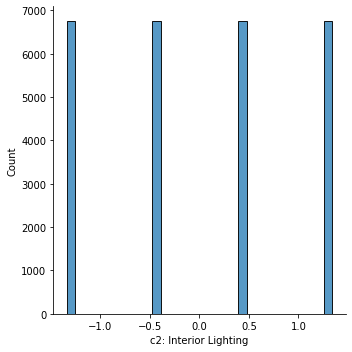

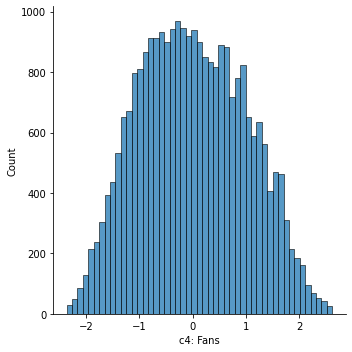

In [69]:
sns.displot(normalized_df['c0: Heating'])
sns.displot(normalized_df['c1: Cooling'])
sns.displot(normalized_df['c2: Interior Lighting'])
sns.displot(normalized_df['c4: Fans'])

In [70]:
train_data, test_data = train_test_split(normalized_df,test_size = 0.15)
X_train = train_data.iloc[:,:-4]
Y_train = train_data.iloc[:,-4:]
X_test = test_data.iloc[:,:-4]
Y_test = test_data.iloc[:,-4:]
Y_test
# Y_test.iloc[:,0]
# X_test

,c0: Heating,c1: Cooling,c2: Interior Lighting,c4: Fans
13810,-0.600551,0.662195,1.341641,1.439220
23393,-0.496775,-0.253052,-0.447214,1.171114
18794,0.640351,-1.454696,-1.341641,-1.588933
12480,-0.027730,0.191896,-1.341641,-0.761176
6769,3.066007,-1.450338,-1.341641,-2.040740
...,...,...,...,...
7175,-0.562384,-0.445089,1.341641,0.683801
22097,-0.624208,-0.259615,-0.447214,0.984222
10965,-0.475641,0.443384,1.341641,-0.637320
18845,-0.544404,-0.516557,-0.447214,0.541109


In [71]:

from tensorflow.keras.layers import Dense, Input, BatchNormalization

from tensorflow.keras.callbacks import ModelCheckpoint, Callback
from tensorflow.keras.models import Model

In [72]:
inputs = Input(shape = (7,))
h = Dense(64,activation = "relu",kernel_initializer='glorot_uniform',kernel_regularizer = "l2",name = "first_branch1")(inputs)
h = BatchNormalization(name = "first_branch5")(h)
h1 = Dense(16,activation = "relu",kernel_regularizer = "l2",name = 'first_branch2')(h)
h1 = BatchNormalization(name = "first_branch6")(h1)
h2 = Dense(8,activation = 'linear', name = 'first_branch3')(h1)
outputs1 = Dense(1,activation = 'linear',name = 'first_branch4')(h2)

h = Dense(64,activation = "relu",kernel_regularizer = "l2",name = "second_branch1",trainable = False)(inputs)
# h = BatchNormalization()(h)
h = Dense(64,activation = "relu",kernel_regularizer = "l2",name = "second_branch2",trainable = False)(h)
# h = BatchNormalization()(h)
h = Dense(16,activation = "relu",kernel_regularizer = "l2",name = "second_branch3",trainable = False)(h)

outputs2 = Dense(3,activation = "linear",trainable = False,name = 'second_branch4')(h)
model = Model(inputs = inputs,outputs = [outputs1,outputs2])

In [50]:
class callback(Callback):
  def on_train_end(self,logs= None):
    print(logs)
    self.model.get_layer('first_branch1').trainable = False
    self.model.get_layer('first_branch2').trainable = False
    self.model.get_layer('first_branch3').trainable = False
    self.model.get_layer('first_branch4').trainable = False
    self.model.get_layer('first_branch5').trainable = False
    self.model.get_layer('first_branch6').trainable = False
    self.model.get_layer('second_branch1').trainable = True
    self.model.get_layer('second_branch2').trainable = True
    self.model.get_layer('second_branch3').trainable = True
    self.model.get_layer('second_branch4').trainable = True
    self.model.compile(optimizer = 'adam',loss = ["mae","mse"],metrics = ["accuracy"])


In [52]:
model.compile(optimizer = 'adam',loss = ["mae","mse"],metrics = ["accuracy"])
history = model.fit(X_train,[Y_train.iloc[:,0],Y_train.iloc[:,1:]],epochs = 100, verbose = 2,batch_size = 32,validation_split = 0.18,callbacks = [callback()])
history = model.fit(X_train,[Y_train.iloc[:,0],Y_train.iloc[:,1:]],epochs = 100, verbose = 2,batch_size = 32,validation_split = 0.18,callbacks = [callback()])

Epoch 1/100
589/589 - 3s - loss: 3.0973 - first_branch4_loss: 0.3230 - second_branch4_loss: 1.5052 - first_branch4_accuracy: 0.0000e+00 - second_branch4_accuracy: 0.2679 - val_loss: 2.8751 - val_first_branch4_loss: 0.1851 - val_second_branch4_loss: 1.4944 - val_first_branch4_accuracy: 0.0000e+00 - val_second_branch4_accuracy: 0.2542
Epoch 2/100
589/589 - 1s - loss: 2.8844 - first_branch4_loss: 0.2201 - second_branch4_loss: 1.5052 - first_branch4_accuracy: 0.0000e+00 - second_branch4_accuracy: 0.2679 - val_loss: 2.7994 - val_first_branch4_loss: 0.1751 - val_second_branch4_loss: 1.4944 - val_first_branch4_accuracy: 0.0000e+00 - val_second_branch4_accuracy: 0.2542
Epoch 3/100
589/589 - 1s - loss: 2.8222 - first_branch4_loss: 0.2054 - second_branch4_loss: 1.5052 - first_branch4_accuracy: 0.0000e+00 - second_branch4_accuracy: 0.2679 - val_loss: 2.8009 - val_first_branch4_loss: 0.2100 - val_second_branch4_loss: 1.4944 - val_first_branch4_accuracy: 0.0000e+00 - val_second_branch4_accuracy: 0.

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test,[Y_test.iloc[:,0],Y_test.iloc[:,1:]])
arr = model.predict(X_test)

In [100]:
inputs  = Input(shape = (7,))
h = Dense(256,activation = "relu",name = "layer1")(inputs) 
# h = BatchNormalization()(h)
h = Dense(128,activation = "relu",name = "layer2")(h)
# h = BatchNormalization()(h)
h = Dense(64,activation = "linear",name = "layer3")(h)
# h = BatchNormalization()(h)
h = Dense(36,activation = "relu",name = "layer4")(h)
h = Dense(36,activation = "relu",name = "layer5")(h)
h = Dense(16,activation = "relu",name = "layer6")(h)
output = Dense(4,activation = "linear", name = "output")(h)

model = Model(inputs = inputs, outputs = output)

model.compile(optimizer = 'adam', loss = ['mse'], metrics = ["accuracy"])

history = model.fit(X_train,Y_train,epochs = 200,verbose = 2, validation_split = 0.18)


Epoch 1/200
589/589 - 3s - loss: 0.1768 - accuracy: 0.8276 - val_loss: 0.0616 - val_accuracy: 0.9102
Epoch 2/200
589/589 - 2s - loss: 0.0257 - accuracy: 0.9348 - val_loss: 0.0145 - val_accuracy: 0.9480
Epoch 3/200
589/589 - 2s - loss: 0.0180 - accuracy: 0.9447 - val_loss: 0.0120 - val_accuracy: 0.9552
Epoch 4/200
589/589 - 2s - loss: 0.0130 - accuracy: 0.9533 - val_loss: 0.0076 - val_accuracy: 0.9591
Epoch 5/200
589/589 - 2s - loss: 0.0136 - accuracy: 0.9514 - val_loss: 0.0087 - val_accuracy: 0.9564
Epoch 6/200
589/589 - 2s - loss: 0.0076 - accuracy: 0.9633 - val_loss: 0.0081 - val_accuracy: 0.9630
Epoch 7/200
589/589 - 2s - loss: 0.0072 - accuracy: 0.9648 - val_loss: 0.0052 - val_accuracy: 0.9700
Epoch 8/200
589/589 - 2s - loss: 0.0076 - accuracy: 0.9642 - val_loss: 0.0082 - val_accuracy: 0.9545
Epoch 9/200
589/589 - 2s - loss: 0.0070 - accuracy: 0.9660 - val_loss: 0.0075 - val_accuracy: 0.9651
Epoch 10/200
589/589 - 2s - loss: 0.0071 - accuracy: 0.9648 - val_loss: 0.0087 - val_accura

In [101]:
model.evaluate(X_test,Y_test)
arr = model.predict(X_test)

127/127 [==============================] - 0s 2ms/step - loss: 8.0327e-04 - accuracy: 0.9946


[0.0008032663026824594, 0.9945679306983948]

In [103]:
ans = pd.DataFrame(arr)
sol = (ans*std.array) + mean.array
sol
df.loc[Y_test.index]
X_test

,0,1,2,3
0,0.745960,104107.567411,233915.399544,3844.778097
1,3.790202,70089.772065,109461.351033,3610.309693
2,40.273349,25668.305100,47336.198564,1348.949624
3,19.030846,85829.915328,47359.666627,2026.285800
4,123.299014,25280.283199,48399.116965,975.448315
...,...,...,...,...
4045,2.034984,63424.359948,234251.943672,3205.643779
4046,0.098633,70032.964221,109798.404976,3458.686314
4047,4.123137,95653.345395,234526.605395,2126.370474
4048,2.236120,60395.452026,109070.629749,3083.572035


,WallU,RoofU,RoofAbp,WinU,WinSHGC,LPD,COP,c0: Heating,c1: Cooling,c2: Interior Lighting,c4: Fans
13810,1.8,1.8,0.7,2.5,0.65,15,4.0,0.93,103548.70,233240.27,3830.69
23393,3.4,1.0,0.5,5.5,0.80,7,5.5,4.22,69984.45,108845.46,3610.50
18794,2.6,1.8,0.5,2.5,0.05,3,5.5,40.27,25917.35,46648.05,1343.73
12480,1.8,1.0,0.5,4.5,0.35,3,2.5,19.09,86301.72,46648.05,2023.55
6769,1.0,1.0,0.3,5.5,0.05,3,4.0,117.17,26077.17,46648.05,972.67
...,...,...,...,...,...,...,...,...,...,...,...
7175,1.0,1.0,0.5,5.5,0.50,15,5.5,2.14,62942.00,233240.27,3210.28
22097,3.4,0.2,0.5,2.5,0.80,7,5.5,0.18,69743.77,108845.46,3457.01
10965,1.8,0.2,0.3,3.5,0.20,15,2.5,4.89,95524.36,233240.27,2125.27
18845,2.6,1.8,0.5,2.5,0.65,7,5.5,2.71,60321.10,108845.46,3093.09


,WallU,RoofU,RoofAbp,WinU,WinSHGC,LPD,COP
13810,1.8,1.8,0.7,2.5,0.65,15,4.0
23393,3.4,1.0,0.5,5.5,0.80,7,5.5
18794,2.6,1.8,0.5,2.5,0.05,3,5.5
12480,1.8,1.0,0.5,4.5,0.35,3,2.5
6769,1.0,1.0,0.3,5.5,0.05,3,4.0
...,...,...,...,...,...,...,...
7175,1.0,1.0,0.5,5.5,0.50,15,5.5
22097,3.4,0.2,0.5,2.5,0.80,7,5.5
10965,1.8,0.2,0.3,3.5,0.20,15,2.5
18845,2.6,1.8,0.5,2.5,0.65,7,5.5


In [104]:
model.save("First Model")

INFO:tensorflow:Assets written to: First Model/assets
